In [1]:
import torch
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    DDIMScheduler,
    AutoencoderKL,
)
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

from ip_adapter import IPAdapter

c:\Users\dasha\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled
Traceback (most recent call last):
  File "c:\Users\dasha\AppData\Local\Programs\Python\Python310\lib\site-packages\xformers\__init__.py", line 57, in _is_triton_available
    import triton  # noqa
ModuleNotFoundError: No module named 'triton'


In [ ]:
# Load the Stable Diffusion model (ensure you have a suitable checkpoint)
model_id = "stabilityai/sd-turbo"


# Load pipeline
pipeline = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline.to("cuda")  # Use GPU for faster inference

Loading pipeline components...: 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stabilityai/sd-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

100%|██████████| 50/50 [00:09<00:00,  5.01it/s]


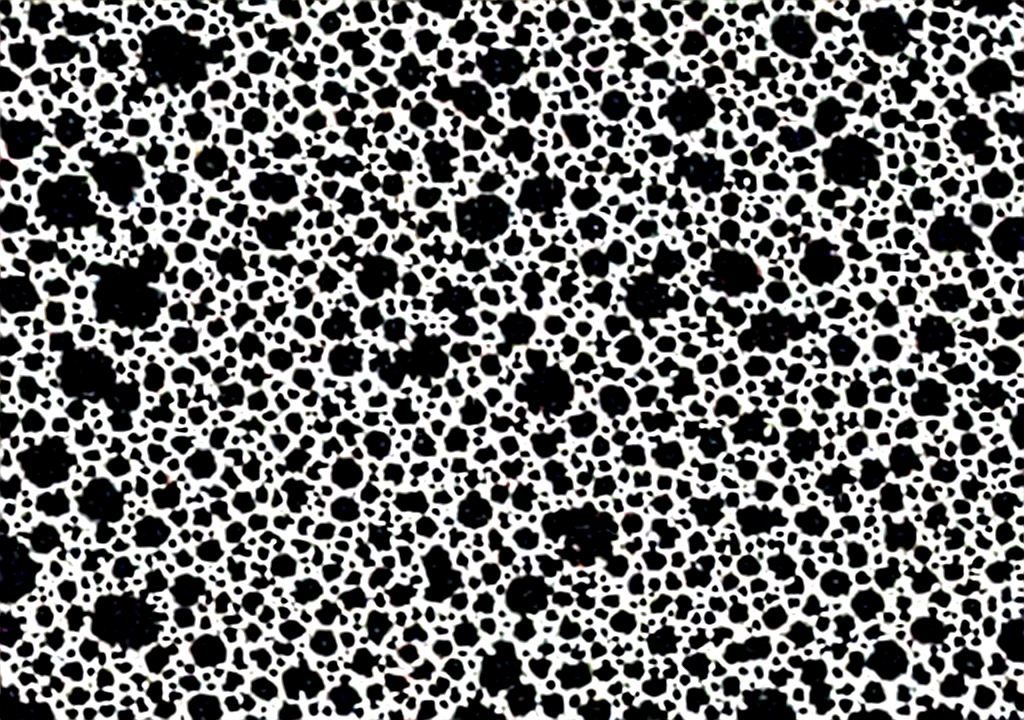

In [ ]:
prompt = (
    "The binary segmentation image: pores in porous material are white and the flat surface as black. a nonconvex set."
    "Irregular, elongated, some non-convex, objects greatly vary in size, scale, scattered."
)

# Define the prompt for generating rock segmentation masks
# Generate image
image = pipeline(
    prompt,
    height=720,
    width=1024,
    num_inference_steps=50,
    guidance_scale=7.5,
    seed=42,
    negative_prompt="angular, square, triangle, elongated, uniform shapes, geometric patterns, symmetry, low contrast, blurry, gradients"
    ).images[0]

# Save the generated image
image

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

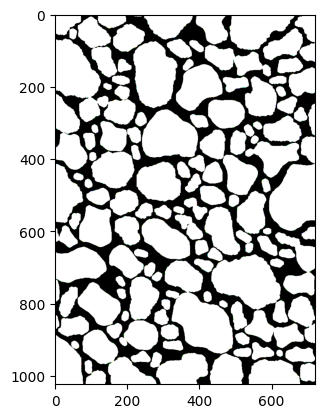

In [27]:
img = np.array(image)
res = cv2.dilate(img, kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)), iterations=2)
_, res2 = cv2.threshold(res, 60, 255, cv2.THRESH_BINARY)
plt.imshow(res2)